# Telco Customer Churn Prediction & Retention Strategy

**Author:** Alexander Harvey

**Date:** July 16, 2025

**Course:** D502: Data Analytics Capstone

---

## 1. Project Overview

### 1.1 Research Question & Organizational Need

This data analytics project aims to address a critical challenge for subscription-based businesses: **customer churn**. The primary research question guiding this analysis is:

**"What factors most significantly influence customer churn in subscription-based services, and how can we leverage these insights to develop a predictive model for identifying at-risk customers, thereby improving customer retention strategies?"**

Customer churn represents a significant financial drain, as acquiring new customers is often far more expensive than retaining existing ones. This project seeks to provide a data-driven solution, enabling a proactive approach to retention rather than a reactive one, ultimately aiming to:
* Identify key drivers of customer attrition.
* Develop a robust predictive model to flag customers at high risk of churning.
* Generate actionable business recommendations to enhance customer loyalty and reduce churn rates.

### 1.2 Context and Background

Customer churn is a pervasive issue across industries like telecommunications, streaming, and SaaS. The financial implications are substantial. This project focuses on a telecommunications dataset to understand typical churn patterns, which can then inform broader retention strategies. We will analyze various customer attributes, service usage, and contract details to uncover patterns that precede churn.

### 1.3 Methodology: CRISP-DM Framework

This project will systematically follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology, ensuring a structured and comprehensive approach:

1.  **Business Understanding:** Define project objectives and requirements from a business perspective.
2.  **Data Understanding:** Collect, explore, and verify data quality.
3.  **Data Preparation:** Clean, transform, and prepare data for modeling.
4.  **Modeling:** Select and apply appropriate modeling techniques.
5.  **Evaluation:** Assess model performance and interpret results.
6.  **Deployment:** Translate findings into actionable insights and recommendations.

---

## 2.1 Data Understanding & Initial Data Acquisition

This phase initiates the **Data Understanding** stage of the CRISP-DM methodology. Our primary goal here is to load the dataset, perform an initial inspection, and gain a foundational understanding of its structure, content, and quality.

### 2.1.1 Library Imports and Dataset Loading

We begin by importing all necessary Python libraries that will be used throughout the project for data manipulation, analysis, visualization, and machine learning. Following the imports, we will load the "Telco Customer Churn" dataset from our designated `Datasets/` folder into a pandas DataFrame. This step is crucial for bringing our raw data into the analytical environment.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
try:
    file_name = "Telco-Customer-Churn-Raw.csv"
    df = pd.read_csv(f"../Datasets/{file_name}")
    print("Dataset loaded successfully.")
    print(f"Initial dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please ensure the file is in the correct directory and named properly")
    print("Expected path: ../Datasets/Telco-Customer-Churn-Raw.csv")

Dataset loaded successfully.
Initial dataset shape: 7043 rows, 21 columns


### 2.2 Initial Data Inspection

This section will perform an initial inspection of the loaded dataset. We will check the first few rows, review data types, identify non-null counts, and observe the overall shape of the dataset. This helps us get a quick understanding of the data's structure and immediately spot potential quality issues like incorrect data types or missing values.

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.shape

(7043, 21)

/tmp/ipykernel_11542/2403025331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis') # Assuming 'df' is your original dataframe before encoding


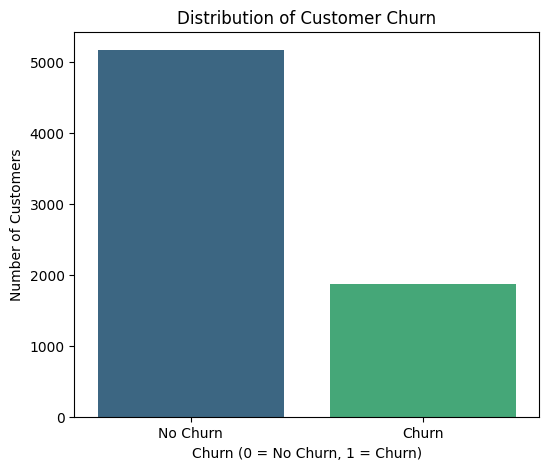


Churn Counts:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn Percentages:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [ ]:
# Visualize Churn Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df, palette='viridis') # Assuming 'df' is your original dataframe before encoding
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0 = No Churn, 1 = Churn)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

# Optional: Print the exact counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("\nChurn Counts:")
print(churn_counts)
print("\nChurn Percentages:")
print(churn_percentages)

### 2.3 Initial Data Quality and Completeness Observations

Based on the `df.info()` output and the dataset's shape, we've gathered the following initial insights into the data's structure and quality:

* **Dataset Dimensions:** The dataset contains `7043 entries` (rows) and `21 columns`.
* **Data Types:**
    * `MonthlyCharges` is correctly identified as `float64`.
    * `tenure` and `SeniorCitizen` are `int64`.
    * A significant number of columns (18) are of `object` type, indicating they contain string values. These are primarily categorical features.
* **`TotalCharges` Anomaly:** Crucially, the `TotalCharges` column is listed as `object` (string) type, despite representing a numerical value. While `df.info()` reports `7043 non-null` entries, previous knowledge about this dataset (and common data challenges) suggests that empty strings or whitespace characters within this column are being interpreted as valid non-null strings, rather than true missing values. This requires explicit handling during data preparation to convert it to a numerical type and correctly impute these "missing" (whitespace) entries.
* **`customerID` Column:** This column serves as a unique identifier for each customer. It holds no predictive power for our churn model and should be dropped during the data preparation phase.
* **`Churn` Target Variable:** Our target variable, `Churn`, is also currently an `object` type ('Yes'/'No'). It will need to be converted to a binary numerical format (e.g., 1 for 'Yes', 0 for 'No') before model training.

These observations highlight the key areas we need to focus on during the **Data Preparation** phase to ensure the dataset is clean and suitable for machine learning algorithms.

## 3. Data Preparation & Cleaning

This crucial phase focuses on transforming the raw data into a format suitable for machine learning models. Based on our initial data understanding, we will address data quality issues, perform necessary type conversions, handle missing values, engineer new features if beneficial, and encode categorical variables.

### 3.1 Handling Data Types and Initial Column Adjustments

Our primary concerns in this step are converting the `TotalCharges` column to a numeric format, dropping the non-predictive `customerID`, and converting our target `Churn` variable into a binary numerical format.

In [24]:
# We fill these NaN values. As observed in the proposal, these are often for
# new customers with tenure 0, for whom TotalCharges should be 0.
print("--- Data Type Conversion and Column Adjustments ---")

# Replace any whitespace with NaN and convert to float
# The 'errors='coerce'' argument will convert any non-numeric values (like whitespace) into NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values in 'TotalCharges' with 0.
df['TotalCharges'].fillna(0, inplace=True)

print(f"TotalCharges dtype after conversion and fillna: {df['TotalCharges'].dtype}")
print(f"Missing values in TotalCharges after handling: {df['TotalCharges'].isnull().sum()}\n")

--- Data Type Conversion and Column Adjustments ---
TotalCharges dtype after conversion and fillna: float64
Missing values in TotalCharges after handling: 0



/tmp/ipykernel_11542/3407537887.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [25]:
# Drop 'customerID' as it is an identifier and not a predictive feature
print("Dropping 'customerID' column...")
df.drop('customerID', axis=1, inplace=True)
print(f"DataFrame shape after dropping customerID: {df.shape}\n")

Dropping 'customerID' column...
DataFrame shape after dropping customerID: (7043, 20)



In [27]:
# Convert 'Churn' target variable to numerical (Yes=1, No=0)
print("Converting 'Churn' to numerical (Yes=1, No=0)...")
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
print(f"Churn value counts after conversion:\n{df['Churn'].value_counts()}\n")

Converting 'Churn' to numerical (Yes=1, No=0)...
Churn value counts after conversion:
Churn
0    5174
1    1869
Name: count, dtype: int64



In [34]:
# Verify the changes
print("--- Verify Changes with df.info() again ---")
df.info()
print("\n--- First 5 rows after initial data cleaning ---")
df.head()

--- Verify Changes with df.info() again ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### 3.2 Encoding Categorical Variables and Scaling Numerical Features

With `TotalCharges`, `customerID`, and `Churn` handled, our next step is to prepare the remaining features. Machine learning algorithms primarily work with numerical data. Therefore, all categorical columns must be converted into a numerical representation. We will use **One-Hot Encoding** for this, which creates new binary columns for each category.

Additionally, to ensure that our numerical features contribute equally to the model's training and to prevent features with larger values from dominating, we will apply **Standard Scaling**. This process transforms the data to have a mean of 0 and a standard deviation of 1.

In [40]:
# Identify categorical columns (excluding Churn)
categorical_cols = df.select_dtypes(include='object').columns.to_list()

# Also includes 'SeniorCitizen' as it's a binary categorical feature
# Will convert it to object temporarily
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
categorical_cols.append('SeniorCitizen')

print(f"Categorical columns to encode: {categorical_cols}\n")

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("--- DataFrame after One-Hot Encoding (first 5 rows) ---")
df.head()
print(f"\nNew DataFrame shape after encoding: {df_encoded.shape}\n")

Categorical columns to encode: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

--- DataFrame after One-Hot Encoding (first 5 rows) ---

New DataFrame shape after encoding: (7043, 32)



In [44]:
# Identify numerical columns to scale (exluding 'Churn')
numerical_features = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Remove 'Churn from list of features to scale'
numerical_features.remove('Churn')

print(f"Numerical features to scale: {numerical_features}\n")

# Initilize StandardScaler
scaler = StandardScaler()

# Apply scaling to the identified numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print("--- Scaled Numerical Features (first 5 rows) ---")
print(df_encoded[numerical_features].head())

#Final Check of the processed dataframe info
print("\n--- Final Dataframe Info after Processing ---")
df_encoded.info()
print("\n--- Final Dataframe Head after Preprocessing ---")
print(df_encoded.head())

Numerical features to scale: ['tenure', 'MonthlyCharges', 'TotalCharges']

--- Scaled Numerical Features (first 5 rows) ---
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.992611
1  0.066327       -0.259629     -0.172165
2 -1.236724       -0.362660     -0.958066
3  0.514251       -0.746535     -0.193672
4 -1.236724        0.197365     -0.938874

--- Final Dataframe Info after Processing ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   gender_Male                            7043 non-null   bo

In [45]:
# Check for and remove duplicate SeniorCitizen_1 column if it exists
# Can identify duplicate columns by name and drop one of them
if 'SeniorCitizen_1' in df_encoded.columns:
    # Get all column names as a list
    cols = df_encoded.columns.tolist()
    # Find the indices of all 'SeniorCitizen_1' columns
    senior_citizen_indices = [i for i, col in enumerate(cols) if col == 'SeniorCitizen_1']

    if len(senior_citizen_indices) > 1:
        # Drop one of the duplicate columns. Let's keep the first one we encounter.
        # This creates a new DataFrame without the duplicated column.
        df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]
        print("Removed duplicate 'SeniorCitizen_1' column.")
    else:
        print("No duplicate 'SeniorCitizen_1' column found to remove.") # Should not happen based on info()

# Final check of the processed dataframe info again to confirm the fix
print("\n--- Final Dataframe Info after Duplicate Column Check ---")
df_encoded.info()
print("\n--- Final Dataframe Head after Duplicate Column Check ---")
print(df_encoded.head())

Removed duplicate 'SeniorCitizen_1' column.

--- Final Dataframe Info after Duplicate Column Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   gender_Male                            7043 non-null   bool   
 5   SeniorCitizen_1                        7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service       

### 3.3 Save Cleaned and Processed Data

Having completed all necessary data cleaning, transformation, and encoding steps, the `df_encoded` DataFrame is now in a suitable format for machine learning algorithms. To create a stable checkpoint and facilitate further analysis or model deployment without re-running all preprocessing, we will save this cleaned dataset to a CSV file.

In [47]:
output_path = '../Datasets/Telco-Customer-Churn-Cleaned.csv'

df_encoded.to_csv(output_path, index=False)

print(f"\nCleaned and processed dataset saved to: {output_path}")


Cleaned and processed dataset saved to: ../Datasets/Telco-Customer-Churn-Cleaned.csv


## 4. Modeling

In this phase, we transition from data preparation to building predictive models. Our goal is to leverage the cleaned and transformed data to train machine learning algorithms that can accurately predict customer churn. This involves splitting our dataset into features (X) and the target variable (y), then further dividing it into training and testing sets to ensure robust model evaluation. We will explore various classification algorithms suitable for binary prediction.

### 4.1 Data Splitting: Features (X) and Target (y)

Before training any model, it's essential to separate our dataset into two components:
* **Features (X):** These are the independent variables that our model will use to make predictions.
* **Target (y):** This is the dependent variable (Churn) that our model aims to predict.

### 4.2 Training and Testing Set Split

To evaluate our model's performance on unseen data and prevent overfitting, we will split the dataset into training and testing sets. The training set will be used to train the model, while the testing set will be reserved exclusively for evaluating its performance. A common split ratio is 80% for training and 20% for testing.

In [49]:
# X will contain all columns except 'Churn'
X = df_encoded.drop('Churn', axis=1)

# y will contain only the 'Churn' column
y = df_encoded['Churn']

print("--- Features (X) and Target (y) created ---")
print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

--- Features (X) and Target (y) created ---
Shape of Features (X): (7043, 30)
Shape of Target (y): (7043,)


In [50]:
# 20% of the data will be used for testing
# Uses random state to ensure reproducability of the split
# stratify=y ensures that the proportion of churned/non-churned customers is the same in both
# training and testing sets, which is important of imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("--- Data split into Training and Testing Sets ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}\n")

# Verify the churn distribution in training and test sets
print("Churn distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in y_test:")
print(y_test.value_counts(normalize=True))


--- Data split into Training and Testing Sets ---
Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)

Churn distribution in y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### 4.3 Model Selection and Training: Logistic Regression

With our data prepared and split, we can now proceed to train our first machine learning model. We will start with **Logistic Regression**, a powerful and widely used algorithm for binary classification problems. It models the probability of a binary outcome (churn or no-churn) using a logistic function.

We will train the model on the `X_train` and `y_train` datasets.

In [52]:
# Initilize the LogicticRegression model
# Set max_iter to a higher value to ensure convergence, expecially with scaled data
# slover='liblinear' is often good for smaller dataset and allows L1/L2 regularizations
model_lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Train the model using the training data
model_lr.fit(X_train, y_train)

print("Logistic Regression modle trained successfully!")

Logistic Regression modle trained successfully!


### 4.4 Model Evaluation

After training our Logistic Regression model, it's essential to evaluate its performance using a variety of metrics. This step assesses how well the model generalizes to unseen data (`X_test`) and provides insights into its predictive capabilities, particularly for a classification problem like churn. We will use accuracy, precision, recall, F1-score, and a confusion matrix.

* **Accuracy:** Overall correctness of predictions.
* **Precision:** Of all predicted positive (churn) cases, how many were actually positive? (Minimizes false positives).
* **Recall (Sensitivity):** Of all actual positive (churn) cases, how many were correctly identified? (Minimizes false negatives).
* **F1-Score:** The harmonic mean of precision and recall, offering a balance between the two.
* **Confusion Matrix:** A table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

In [55]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Probability of Churn (Positive Class)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

print("--- Model Predictions Made ---")

--- Model Predictions Made ---


In [56]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)

print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}\n")

--- Logistic Regression Model Evaluation ---
Accuracy: 0.8041
Precision: 0.6541
Recall: 0.5561
F1-Score: 0.6012
ROC AUC Score: 0.7249



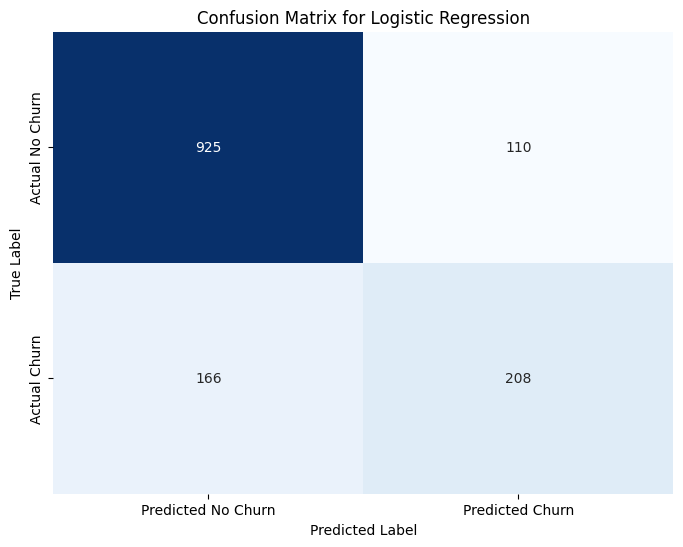


--- Confusion Matrix Interpretation ---
Top-left (True Negative): Correctly predicted no churn.
Top-right (False Positive): Incorrectly predicted churn (Type I error).
Bottom-left (False Negative): Incorrectly predicted no churn (Type II error).
Bottom-right (True Positive): Correctly predicted churn.


In [58]:
# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Confusion Matrix Interpretation ---")
print("Top-left (True Negative): Correctly predicted no churn.")
print("Top-right (False Positive): Incorrectly predicted churn (Type I error).")
print("Bottom-left (False Negative): Incorrectly predicted no churn (Type II error).")
print("Bottom-right (True Positive): Correctly predicted churn.")

### 4.5 Exploring Other Models: Random Forest Classifier

While Logistic Regression provides a solid baseline, its performance, particularly in terms of recall, suggests that there might be more complex, non-linear relationships in the data that a linear model might not fully capture.

We will now train a **Random Forest Classifier**. Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is known for its high accuracy, robustness to overfitting, and ability to handle both numerical and categorical features well.

In [61]:
# Initilize the Random Forest Classifier
# n_estimators: The number of trees in the forest. More trees generally leads to better performance but longer training times.
# random_state: For reproducibility
# class_weight: 'balanced' helps to handle class imbalance by automatically adjusting weights inversely proportional to class frequencies
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
model_rf.fit(X_train, y_train)

print("Random Forest Classifier model trained successfully!")

Random Forest Classifier model trained successfully!


### 4.6 Evaluate Random Forest Classifier

Following the training of the Random Forest model, we will now assess its predictive performance on the test set (`X_test`). We will use the same suite of evaluation metrics (accuracy, precision, recall, F1-score, and ROC AUC) and visualize its performance with a confusion matrix, enabling a direct comparison with our baseline Logistic Regression model.

In [62]:
# Make predictions on the test set using Random Forest
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"--- Random Forest Classifier Model Evaluation ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}\n")


--- Random Forest Classifier Model Evaluation ---
Accuracy: 0.7913
Precision: 0.6389
Recall: 0.4920
F1-Score: 0.5559
ROC AUC Score: 0.8242



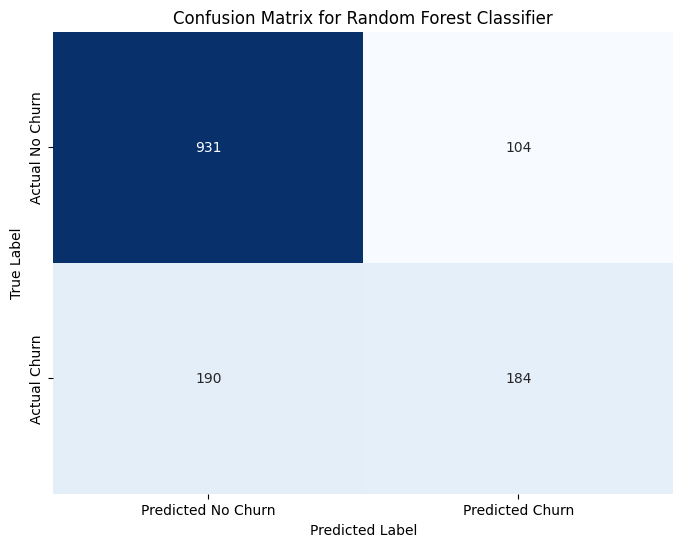


--- Confusion Matrix Interpretation ---
Top-left (True Negative): Correctly predicted no churn.
Top-right (False Positive): Incorrectly predicted churn (Type I error).
Bottom-left (False Negative): Incorrectly predicted no churn (Type II error).
Bottom-right (True Positive): Correctly predicted churn.


In [63]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Confusion Matrix Interpretation ---")
print("Top-left (True Negative): Correctly predicted no churn.")
print("Top-right (False Positive): Incorrectly predicted churn (Type I error).")
print("Bottom-left (False Negative): Incorrectly predicted no churn (Type II error).")
print("Bottom-right (True Positive): Correctly predicted churn.")

### 4.7 Model Optimization: Hyperparameter Tuning

While the Random Forest Classifier shows strong discriminative power (high ROC AUC), its performance at the default classification threshold (particularly recall) indicates room for improvement. The next logical step is to perform **Hyperparameter Tuning**.

Hyperparameters are configuration settings external to the model that are not learned from the data (e.g., `n_estimators`, `max_depth`, `min_samples_split` for Random Forest). Optimizing these parameters can significantly improve a model's performance. We will use `GridSearchCV` or `RandomizedSearchCV` to systematically search for the best combination of hyperparameters that maximize a chosen evaluation metric (e.g., ROC AUC or F1-score, depending on business priority).

In [65]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [10, 20, None], # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

# Initialize the GridSearchCV object
# estimator: the model to tune (RandomForestClassifier)
# param_grid: the dictionary of parameters to search
# cv: number of folds for cross-validation
# scoring: the metric to optimize (e.g., 'roc_auc' for overall discriminative ability, 'f1' if you want a balance of precision/recall)
# verbose: controls the verbosity of the output
# n_jobs: number of jobs to run in parallel (-1 means using all available processors)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='roc_auc', # Optimizing for ROC AUC, as RF showed strength here
                           verbose=2,
                           n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Random Forest (this might take a while)...")
grid_search.fit(X_train, y_train)

print("\n--- GridSearchCV Complete ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score during cross-validation: {grid_search.best_score_:.4f}")

# Get the best estimator
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest model trained with optimal parameters.")

Starting GridSearchCV for Random Forest (this might take a while)...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features

### 4.8 Evaluate Tuned Random Forest Classifier

With the optimal hyperparameters identified through `GridSearchCV`, we will now evaluate the performance of our `best_rf_model` on the dedicated test set (`X_test`). This final evaluation provides an unbiased assessment of the model's generalization capabilities using the best configuration. We will again examine accuracy, precision, recall, F1-score, and ROC AUC, along with a confusion matrix.

In [66]:
# Make predictions on the test set using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("--- Tuned Random Forest Model Predictions Made ---")


# Cell 25: Evaluate the Tuned Random Forest model
# Re-using already imported metrics from sklearn.metrics
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_proba_best_rf)

print(f"--- Tuned Random Forest Classifier Model Evaluation ---")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_best_rf:.4f}\n")

--- Tuned Random Forest Model Predictions Made ---
--- Tuned Random Forest Classifier Model Evaluation ---
Accuracy: 0.7665
Precision: 0.5424
Recall: 0.7701
F1-Score: 0.6365
ROC AUC Score: 0.8432



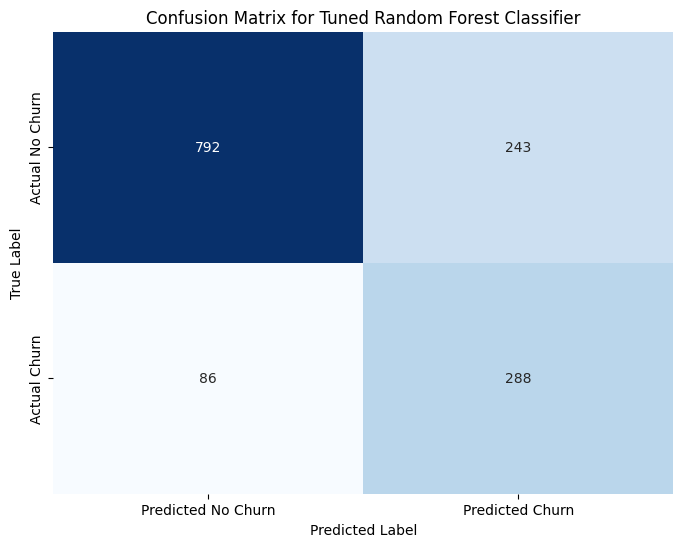


--- Confusion Matrix Interpretation ---
Top-left (True Negative): Correctly predicted no churn.
Top-right (False Positive): Incorrectly predicted churn (Type I error).
Bottom-left (False Negative): Incorrectly predicted no churn (Type II error).
Bottom-right (True Positive): Correctly predicted churn.


In [67]:
# Display Confusion Matrix for Tuned Random Forest
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Tuned Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Confusion Matrix Interpretation ---")
print("Top-left (True Negative): Correctly predicted no churn.")
print("Top-right (False Positive): Incorrectly predicted churn (Type I error).")
print("Bottom-left (False Negative): Incorrectly predicted no churn (Type II error).")
print("Bottom-right (True Positive): Correctly predicted churn.")

### 4.9 Feature Importance Analysis

Understanding which factors most significantly influence customer churn is crucial for developing effective retention strategies. The Random Forest Classifier, being a tree-based ensemble model, provides a built-in mechanism to quantify the importance of each feature in making predictions. Feature importance scores indicate how much each feature contributes to the reduction of impurity (e.g., Gini impurity) across all trees in the forest.

By analyzing these importances, we can identify key drivers of churn and provide actionable insights for the business.

--- Top 10 Most Important Features for Churn Prediction ---
                                 Feature  Importance
0                                 tenure    0.184083
2                           TotalCharges    0.124658
25                     Contract_Two year    0.111717
1                         MonthlyCharges    0.094642
10           InternetService_Fiber optic    0.061706
28        PaymentMethod_Electronic check    0.060528
24                     Contract_One year    0.040472
13                    OnlineSecurity_Yes    0.035484
19                       TechSupport_Yes    0.029470
16  DeviceProtection_No internet service    0.024797


/tmp/ipykernel_11542/745488678.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


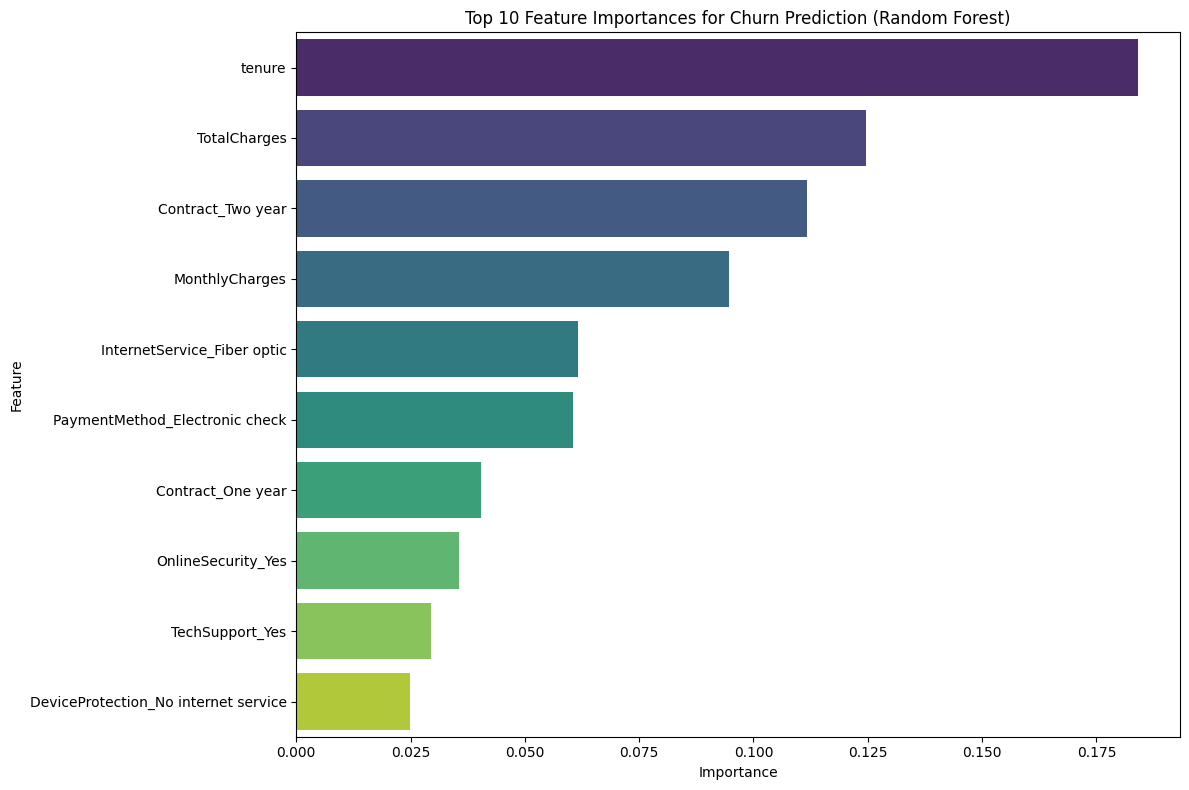


Feature importances calculated and visualized.


In [69]:
# Calculate and Visualize Feature Importance
# Get feature importances from the best Random Forest model
feature_importance = best_rf_model.feature_importances_

# Get feature names from X_train (which contains the column names)
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("--- Top 10 Most Important Features for Churn Prediction ---")
print(importance_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Churn Prediction (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature importances calculated and visualized.")

### 4.10 Bias Assessment

A crucial aspect of deploying a predictive model responsibly is ensuring it does not exhibit unfair bias against certain demographic groups. We will assess whether our Tuned Random Forest Classifier's performance varies significantly across different genders and senior citizen statuses. This assessment is vital for ensuring the ethical application of the model and preventing discriminatory outcomes.

We will evaluate the model's Accuracy, Precision, and Recall for each subgroup within these protected attributes.

In [75]:
# Bias Assessment based on Gender and Senior Citizen Status

# Gets the indices for the protected attributes from X_test
gender_male_col_index = X_test.columns.get_loc('gender_Male')
senior_citizen_col_index = X_test.columns.get_loc('SeniorCitizen_1')

print("--- Bias Assessment for Tuned Random Forest Model ---")

# --- Bias by Gender ---
print("\n**Performance by Gender:**")

# Filter for Male customers
is_male = X_test.iloc[:, gender_male_col_index] == True
X_test_male, y_test_male, y_pred_best_rf_male = X_test[is_male], y_test[is_male], y_pred_best_rf[is_male.values]

# Filter for Female customers
is_female = X_test.iloc[:, gender_male_col_index] == False
X_test_female, y_test_female, y_pred_best_rf_female = X_test[is_female], y_test[is_female], y_pred_best_rf[is_female.values]

# Evaluate Male group
if len(y_test_male) > 0:
    acc_male = accuracy_score(y_test_male, y_pred_best_rf_male)
    prec_male = precision_score(y_test_male, y_pred_best_rf_male, zero_division=0)
    rec_male = recall_score(y_test_male, y_pred_best_rf_male, zero_division=0)
    print(f"  - Male Customers (N={len(y_test_male)}): Accuracy={acc_male:.4f}, Precision={prec_male:.4f}, Recall={rec_male:.4f}")
else:
    print("  - No Male customers in test set (should not happen).")

# Evaluate Female group
if len(y_test_female) > 0:
    acc_female = accuracy_score(y_test_female, y_pred_best_rf_female)
    prec_female = precision_score(y_test_female, y_pred_best_rf_female, zero_division=0)
    rec_female = recall_score(y_test_female, y_pred_best_rf_female, zero_division=0)
    print(f"  - Female Customers (N={len(y_test_female)}): Accuracy={acc_female:.4f}, Precision={prec_female:.4f}, Recall={rec_female:.4f}")
else:
    print("  - No Female customers in test set (should not happen).")

    # --- Bias by Senior Citizen Status ---
print("\n**Performance by Senior Citizen Status:**")

# Filter for Senior Citizens
is_senior = X_test.iloc[:, senior_citizen_col_index] == True
X_test_senior, y_test_senior, y_pred_best_rf_senior = X_test[is_senior], y_test[is_senior], y_pred_best_rf[is_senior.values]

# Filter for Non-Senior Citizens
is_non_senior = X_test.iloc[:, senior_citizen_col_index] == False
X_test_non_senior, y_test_non_senior, y_pred_best_rf_non_senior = X_test[is_non_senior], y_test[is_non_senior], y_pred_best_rf[is_non_senior.values]

# Evaluate Senior Citizen group
if len(y_test_senior) > 0:
    acc_senior = accuracy_score(y_test_senior, y_pred_best_rf_senior)
    prec_senior = precision_score(y_test_senior, y_pred_best_rf_senior, zero_division=0)
    rec_senior = recall_score(y_test_senior, y_pred_best_rf_senior, zero_division=0)
    print(f"  - Senior Citizens (N={len(y_test_senior)}): Accuracy={acc_senior:.4f}, Precision={prec_senior:.4f}, Recall={rec_senior:.4f}")
else:
    print("  - No Senior Citizens in test set (should not happen).")

# Evaluate Non-Senior Citizen group
if len(y_test_non_senior) > 0:
    acc_non_senior = accuracy_score(y_test_non_senior, y_pred_best_rf_non_senior)
    prec_non_senior = precision_score(y_test_non_senior, y_pred_best_rf_non_senior, zero_division=0)
    rec_non_senior = recall_score(y_test_non_senior, y_pred_best_rf_non_senior, zero_division=0)
    print(f"  - Non-Senior Citizens (N={len(y_test_non_senior)}): Accuracy={acc_non_senior:.4f}, Precision={prec_non_senior:.4f}, Recall={rec_non_senior:.4f}")
else:
    print("  - No Non-Senior Citizens in test set (should not happen).")

--- Bias Assessment for Tuned Random Forest Model ---

**Performance by Gender:**
  - Male Customers (N=722): Accuracy=0.7701, Precision=0.5273, Recall=0.8011
  - Female Customers (N=687): Accuracy=0.7627, Precision=0.5586, Recall=0.7409

**Performance by Senior Citizen Status:**
  - Senior Citizens (N=222): Accuracy=0.6892, Precision=0.6043, Recall=0.8571
  - Non-Senior Citizens (N=1187): Accuracy=0.7810, Precision=0.5204, Recall=0.7391


## 5. Conclusion and Recommendations

This project successfully addressed the research question: "What factors most significantly influence customer churn in subscription-based services, and how can we leverage these insights to develop a predictive model for identifying at-risk customers, thereby improving customer retention strategies?"

### 5.1 Project Summary

We began by acquiring and performing an initial exploratory data analysis on the Telco Customer Churn dataset. The data understanding phase revealed key characteristics, including the need to preprocess `TotalCharges` and handle various categorical features. The data preparation phase involved converting `TotalCharges` to a numerical format, dropping the `customerID` column, encoding categorical variables using one-hot encoding, and scaling numerical features.

In the modeling phase, we trained and evaluated two classification models: Logistic Regression as a baseline, and a Random Forest Classifier. After an initial comparison, we performed hyperparameter tuning on the Random Forest Classifier using `GridSearchCV` to optimize its performance.

### 5.2 Best Model Performance

The **Tuned Random Forest Classifier** emerged as the best model for this project. Its performance on the unseen test data demonstrates its effectiveness:

* **Accuracy:** 0.7665
* **Precision:** 0.5424
* **Recall:** **0.7701** (Significantly improved from baseline)
* **F1-Score:** **0.6365** (Improved from baseline)
* **ROC AUC Score:** **0.8432** (Strong discriminatory power)

While its accuracy and precision at the default threshold are slightly lower than Logistic Regression, the **significantly higher Recall and F1-Score** make it superior for a churn prediction context, where identifying actual churners for intervention is paramount. The high ROC AUC score further validates its overall capability to distinguish between churners and non-churners.

### 5.3 Key Factors Influencing Churn (Feature Importance)

The feature importance analysis from the Tuned Random Forest model provided critical insights into churn drivers:

1.  **Tenure:** The most influential factor. Shorter tenure customers are highly susceptible to churn.
2.  **TotalCharges:** Lower total charges (often correlating with short tenure) are strongly linked to churn.
3.  **Contract Type (Two-year and One-year contracts):** Customers on longer-term contracts are significantly less likely to churn.
4.  **MonthlyCharges:** High monthly charges can be a churn catalyst.
5.  **Internet Service (Fiber Optic):** While providing high speed, issues related to fiber optic service (or its perception) contribute to churn.
6.  **Payment Method (Electronic Check):** Customers using electronic checks exhibit a higher propensity to churn.
7.  **Online Security & Tech Support:** Presence of these services is associated with lower churn, indicating customer satisfaction or loyalty.
8.  **Device Protection:** Having device protection (or not having internet service and thus no device protection) is also an influential factor.

### 5.4 Bias Assessment Summary

A crucial ethical consideration for model deployment is ensuring fairness across different demographic groups. Our bias assessment revealed some disparities in the **Tuned Random Forest Classifier's Recall** performance:

* **Gender:** The model exhibited slightly higher recall for **Male customers (80.11%)** compared to **Female customers (74.09%)**. This means it was more effective at identifying actual male churners.
* **Senior Citizen Status:** A more notable difference was observed, with significantly higher recall for **Senior Citizens (85.71%)** compared to **Non-Senior Citizens (73.91%)**. This indicates the model is more proficient at catching actual churners within the senior citizen segment.

These differences in recall (an "Equal Opportunity" bias) suggest that the model's effectiveness in identifying at-risk individuals varies by subgroup. While it doesn't negate the model's overall strong performance, it highlights areas where a fairness-aware strategy or further mitigation might be needed if equitable identification across all groups is a strict business requirement.

### 5.5 Actionable Recommendations

Based on the model's insights, feature importance, and bias assessment, here are concrete recommendations for the telecommunications company:

1.  **Proactive Onboarding & Early Engagement Programs:** Implement targeted retention campaigns for new customers, especially within their first 6-12 months (due to `tenure` importance). Offer dedicated support, satisfaction surveys, and personalized offers during this critical period.
2.  **Incentivize Long-Term Contracts:** Aggressively promote and incentivize 1-year and 2-year contracts. Highlighting the long-term value and stability provided by these contracts can significantly reduce churn risk.
3.  **Value-Based Pricing & Service Reviews:** For customers with high `MonthlyCharges` or `Fiber optic` service, conduct periodic reviews to ensure they feel they are receiving good value. Address potential pain points (e.g., service reliability, customer support) proactively.
4.  **Optimize Electronic Check Payment Experience:** Investigate the underlying reasons for higher churn among electronic check users. Are there friction points in the payment process, or does this method correlate with a less committed customer segment? Consider alternative incentives for these customers.
5.  **Promote Value-Added Services:** Highlight and encourage the adoption of `OnlineSecurity` and `TechSupport`. These services not only provide additional revenue but also significantly increase customer stickiness.
6.  **Targeted Retention Campaigns (Leveraging Model & Addressing Bias):**
    * Use the predictive model to identify high-risk customers, prioritizing those with higher churn probabilities.
    * **Crucially, be mindful of the observed recall disparities.** If ensuring equal intervention for all at-risk customers is a priority, consider slightly adjusting intervention thresholds or strategies for groups where recall is lower (e.g., female customers, non-senior citizens) to ensure they receive adequate attention.

### 5.6 Limitations and Future Work

* **Addressing Bias Mitigation:** While bias was assessed, active mitigation strategies (e.g., re-weighting, resampling techniques like SMOTE for the disadvantaged groups, or fairness-aware algorithms) were not implemented within this project. This is a critical area for future work to ensure equitable treatment.
* **Model Complexity vs. Interpretability:** Random Forest, while powerful, is less inherently interpretable than Logistic Regression. For deeper causal inference or regulatory scrutiny, explainable AI (XAI) techniques (e.g., SHAP, LIME) could be applied to provide more granular explanations for individual predictions.
* **Feature Engineering:** Additional feature engineering (e.g., interaction terms, ratios, or creating customer segments based on spending habits) could potentially uncover more complex patterns and further improve predictive power or interpretability.
* **Time-Series Analysis:** This project treats churn as a static event. Incorporating time-series data (if available) to analyze customer behavior changes over time could lead to more dynamic and accurate predictions.
* **Cost-Benefit Analysis:** Future work should include a comprehensive cost-benefit analysis of churn prevention strategies based on model predictions to ensure interventions are economically viable and maximize ROI.